In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

C:\Users\Michael Haile\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
la_crime_df=pd.read_csv("./Data/LA_Crime_Data.csv")
la_crime_df.head(1)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,3/1/2020 0:00,3/1/2020 0:00,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506


In [3]:
any(la_crime_df.isna())

True

In [4]:
print("Number of rows: ", la_crime_df.shape[0])

Number of rows:  925720


In [5]:
print("Number of columns: ", la_crime_df.shape[1])

Number of columns:  28


In [6]:
la_crime_df.isnull().sum() # checkin for the number of null values across the dataframe

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           129462
Vict Age               0
Vict Sex          123158
Vict Descent      123168
Premis Cd             11
Premis Desc          559
Weapon Used Cd    606019
Weapon Desc       606019
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          858483
Crm Cd 3          923460
Crm Cd 4          925656
LOCATION               0
Cross Street      780494
LAT                    0
LON                    0
dtype: int64

In [7]:
la_crime_df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [8]:
la_crime_df = la_crime_df[["DATE OCC","TIME OCC","AREA NAME","Part 1-2","Crm Cd Desc","Vict Age","Vict Sex","Vict Descent",
                           "Status Desc","Crm Cd 1","LAT","LON"]]
la_crime_df.head(1)

,DATE OCC,TIME OCC,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status Desc,Crm Cd 1,LAT,LON
0,3/1/2020 0:00,2130,Wilshire,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [9]:
la_crime_df.shape

(925720, 12)

In [10]:
la_crime_df.isnull().sum(axis = 0)

DATE OCC             0
TIME OCC             0
AREA NAME            0
Part 1-2             0
Crm Cd Desc          0
Vict Age             0
Vict Sex        123158
Vict Descent    123168
Status Desc          0
Crm Cd 1            11
LAT                  0
LON                  0
dtype: int64

In [11]:
la_crime_df=la_crime_df.dropna()
la_crime_df.shape

(802537, 12)

In [12]:
la_crime_df.head(2)

,DATE OCC,TIME OCC,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status Desc,Crm Cd 1,LAT,LON
0,3/1/2020 0:00,2130,Wilshire,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506
1,2/8/2020 0:00,1800,Central,1,BURGLARY FROM VEHICLE,47,M,O,Invest Cont,330.0,34.0444,-118.2628


In [13]:
la_crime_df.isnull().sum()

DATE OCC        0
TIME OCC        0
AREA NAME       0
Part 1-2        0
Crm Cd Desc     0
Vict Age        0
Vict Sex        0
Vict Descent    0
Status Desc     0
Crm Cd 1        0
LAT             0
LON             0
dtype: int64

In [14]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802537 entries, 0 to 925719
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   DATE OCC      802537 non-null  object 
 1   TIME OCC      802537 non-null  int64  
 2   AREA NAME     802537 non-null  object 
 3   Part 1-2      802537 non-null  int64  
 4   Crm Cd Desc   802537 non-null  object 
 5   Vict Age      802537 non-null  int64  
 6   Vict Sex      802537 non-null  object 
 7   Vict Descent  802537 non-null  object 
 8   Status Desc   802537 non-null  object 
 9   Crm Cd 1      802537 non-null  float64
 10  LAT           802537 non-null  float64
 11  LON           802537 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 79.6+ MB


In [15]:
# renaming for better readability
la_crime_df.rename(columns={"DATE OCC":"Date_Occ","TIME OCC":"Time_Occ","AREA NAME":"Area_Name","Part 1-2":"Part_1-2",
                           "Crm Cd Desc":"Crm_Cd_Desc","Vict Age":"Vict_Age","Vict Sex":"Vict_Sex",
                           "Vict Descent":"Vict_Descent","Status Desc":"Status_Desc","Crm Cd 1":"Crm_Cd_1",
                            "LAT":"Lat","LON":"Lon"}, inplace = True)

In [16]:
la_crime_df.head(1)

,Date_Occ,Time_Occ,Area_Name,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon
0,3/1/2020 0:00,2130,Wilshire,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [17]:


# Convert the 'DateTime' column to datetime type if not alread


la_crime_df['Date_Occ'] = pd.to_datetime(la_crime_df['Date_Occ'])



In [18]:
la_crime_df.head(1)

,Date_Occ,Time_Occ,Area_Name,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon
0,2020-03-01,2130,Wilshire,1,VEHICLE - STOLEN,0,M,O,Adult Arrest,510.0,34.0375,-118.3506


In [19]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802537 entries, 0 to 925719
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date_Occ      802537 non-null  datetime64[ns]
 1   Time_Occ      802537 non-null  int64         
 2   Area_Name     802537 non-null  object        
 3   Part_1-2      802537 non-null  int64         
 4   Crm_Cd_Desc   802537 non-null  object        
 5   Vict_Age      802537 non-null  int64         
 6   Vict_Sex      802537 non-null  object        
 7   Vict_Descent  802537 non-null  object        
 8   Status_Desc   802537 non-null  object        
 9   Crm_Cd_1      802537 non-null  float64       
 10  Lat           802537 non-null  float64       
 11  Lon           802537 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 79.6+ MB


In [20]:
# To remove the value H value of Vict_Sex
la_crime_df=la_crime_df[la_crime_df["Vict_Sex"]!="H"]
la_crime_df["Vict_Sex"].value_counts()

Vict_Sex
M    379021
F    337975
X     85434
-         1
Name: count, dtype: int64

In [21]:
la_crime_df.nunique()

Date_Occ        1553
Time_Occ        1439
Area_Name         21
Part_1-2           2
Crm_Cd_Desc      138
Vict_Age         103
Vict_Sex           4
Vict_Descent      20
Status_Desc        6
Crm_Cd_1         139
Lat             5376
Lon             4968
dtype: int64

In [22]:
la_crime_df["Area_Name"].nunique()

21

In [23]:
# Top 10 crime location
la_crime_df["Area_Name"].value_counts().head(10)

Area_Name
Central        57981
77th Street    49198
Pacific        46137
Southwest      44808
Hollywood      44421
N Hollywood    40753
Olympic        40670
Wilshire       39826
Southeast      39272
West LA        38613
Name: count, dtype: int64

In [24]:
la_crime_df["Area_Name"].value_counts()

Area_Name
Central        57981
77th Street    49198
Pacific        46137
Southwest      44808
Hollywood      44421
N Hollywood    40753
Olympic        40670
Wilshire       39826
Southeast      39272
West LA        38613
Newton         37579
Rampart        37467
West Valley    34220
Topanga        34061
Van Nuys       34051
Northeast      33924
Devonshire     33273
Harbor         31917
Mission        30519
Hollenbeck     28033
Foothill       25708
Name: count, dtype: int64

In [25]:
la_crime_df["Area_Name"].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'West Valley',
       'West LA', 'Olympic', 'Topanga', 'Northeast', '77th Street',
       'N Hollywood', 'Hollenbeck', 'Harbor', 'Foothill', 'Devonshire',
       'Pacific'], dtype=object)

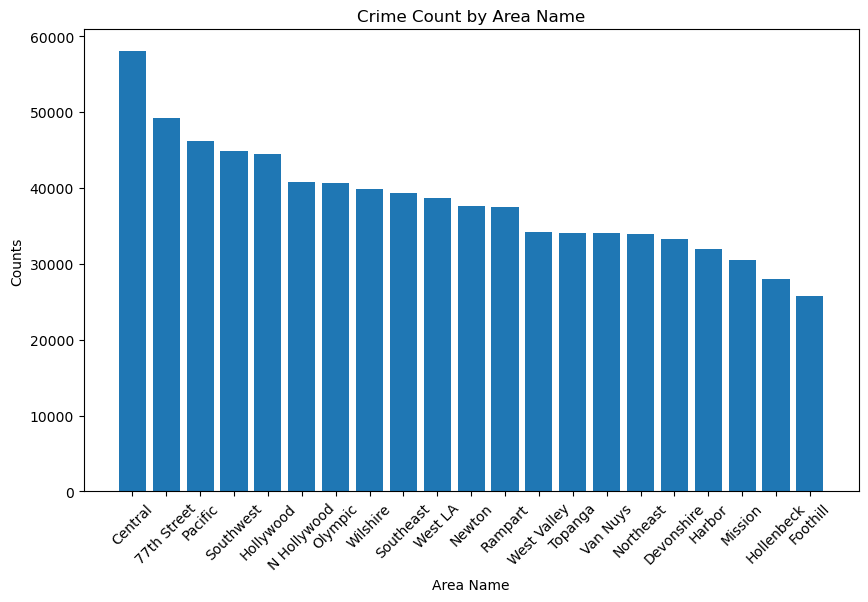

In [26]:

# Calculate value counts
area_counts = la_crime_df["Area_Name"].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(area_counts.index, area_counts.values)  # Use index and values to align data correctly
plt.xlabel("Area Name")
plt.ylabel("Counts")
plt.title("Crime Count by Area Name")
plt.xticks(rotation=45)  # Optional: Rotate the area names for better readability
plt.show()


In [27]:
la_crime_df["Crm_Cd_Desc"].nunique() # numbe of crime descriptions

138

In [28]:
# the top 10 crime types
la_crime_df["Crm_Cd_Desc"].value_counts().head(10)

Crm_Cd_Desc
BATTERY - SIMPLE ASSAULT                                   73348
BURGLARY FROM VEHICLE                                      57042
THEFT OF IDENTITY                                          57031
BURGLARY                                                   56669
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    56108
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             52462
THEFT PLAIN - PETTY ($950 & UNDER)                         47108
INTIMATE PARTNER - SIMPLE ASSAULT                          45882
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)        33048
ROBBERY                                                    31491
Name: count, dtype: int64

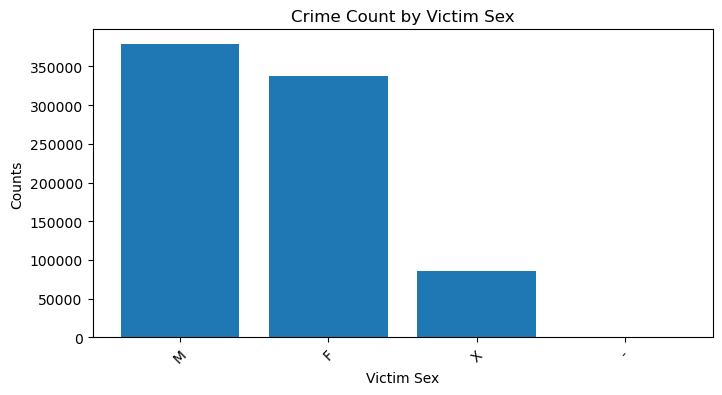

In [29]:


# Calculate value counts for the 'Vict_Sex' column
sex_counts = la_crime_df['Vict_Sex'].value_counts()

# Plotting
plt.figure(figsize=(8, 4))  # Set the figure size as needed
plt.bar(sex_counts.index, sex_counts.values)  # You can choose any color
plt.xlabel('Victim Sex')
plt.ylabel('Counts')
plt.title('Crime Count by Victim Sex')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()


In [30]:
#Filtering out Vict_Age to greater than zero
la_crime_df = la_crime_df[la_crime_df["Vict_Age"]> 0]

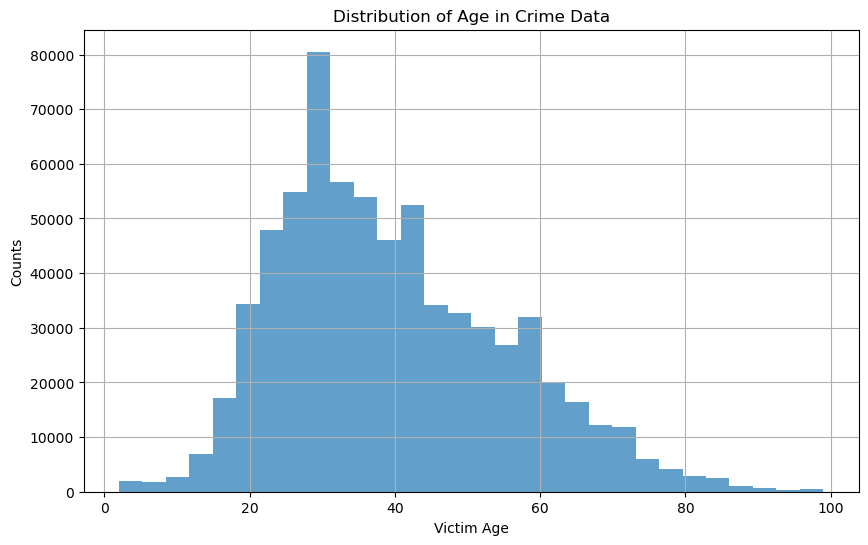

In [31]:
# Age of Victims Distribution


la_crime_df['Vict_Age'] = pd.to_numeric(la_crime_df['Vict_Age'], errors='coerce')

# Drop any NaN values that may have resulted from conversion errors or existing in data
la_crime_df = la_crime_df.dropna(subset=['Vict_Age'])

# Plotting a histogram of the 'Age' column
plt.figure(figsize=(10, 6))
plt.hist(la_crime_df['Vict_Age'], bins=30, alpha=0.7)  # Adjust the number of bins as needed
plt.xlabel('Victim Age')
plt.ylabel('Counts')
plt.title('Distribution of Age in Crime Data')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.show()


In [32]:
la_crime_df["Vict_Age"].max(), la_crime_df["Vict_Age"].min()

(99, 2)

In [33]:
# Top 5 Vict Descents
top5 =la_crime_df.groupby(["Vict_Descent"])["Vict_Age"].count()
top5

Vict_Descent
-         1
A     19980
B    128204
C      3706
D        75
F      3938
G        67
H    276655
I       881
J      1304
K      5059
L        62
O     60991
P       249
S        45
U       156
V       981
W    173400
X     15065
Z       458
Name: Vict_Age, dtype: int64

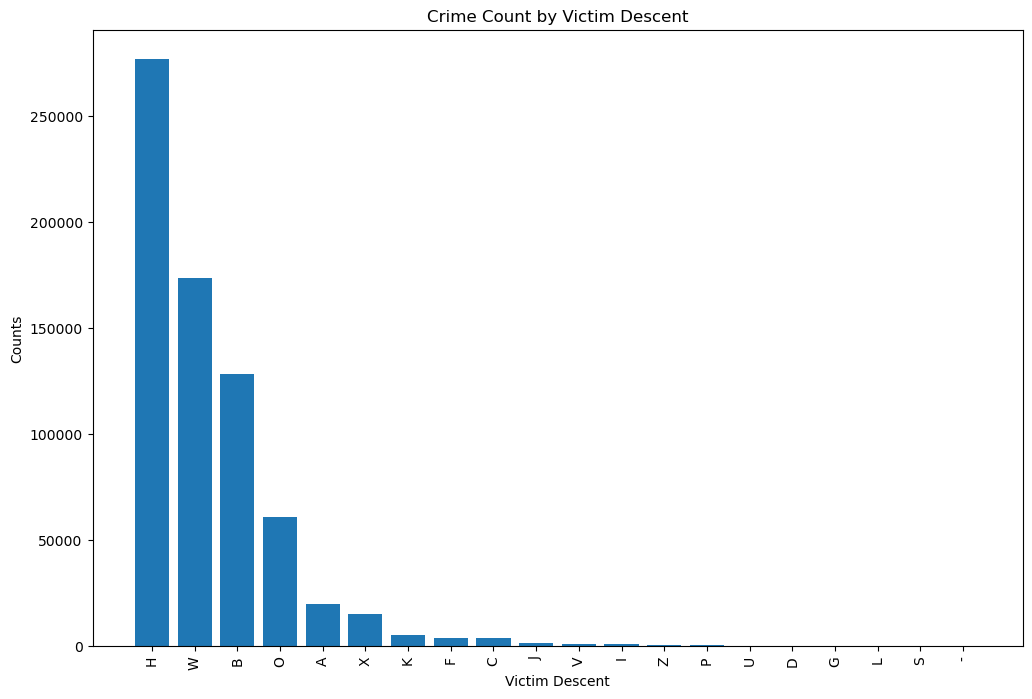

In [34]:

# Calculate the value counts for the 'Vict_Descent' column
descent_counts = la_crime_df['Vict_Descent'].value_counts()

# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as needed
plt.bar(descent_counts.index, descent_counts.values)
plt.xlabel('Victim Descent')
plt.ylabel('Counts')
plt.title('Crime Count by Victim Descent')
plt.xticks(rotation=90)  # Rotate labels for better readability if there are many categories
plt.show()


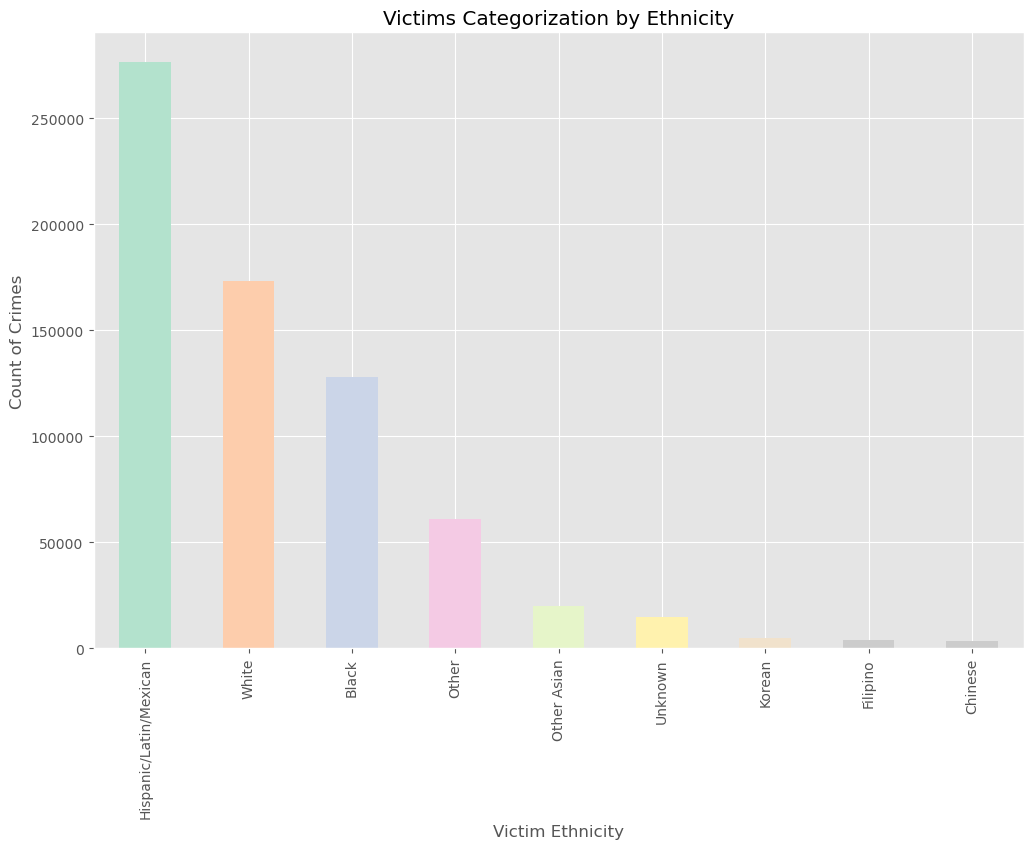

In [35]:


# Renaming values in the 'Vict_Descent' column
rename_dict = {
    'H': 'Hispanic/Latin/Mexican',
    'B': 'Black',
    'W': 'White',
    'A': 'Other Asian',
    'X': 'Unknown',
    'C': 'Chinese',
    'D': 'Cambodian',  # Note the typo fix from 'Combodian' to 'Cambodian'
    'F': 'Filipino',
    'G': 'Guamanian',
    'I': 'American Indian/Alaskan Native',  # Minor correction for consistency
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'Z': 'Asian Indian'
}

for code, description in rename_dict.items():
    la_crime_df.loc[la_crime_df["Vict_Descent"] == code, "Vict_Descent"] = description

# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
la_crime_df["Vict_Descent"].value_counts()[:9].plot.bar(color=plt.cm.Pastel2(np.linspace(0, 1, 9)))
plt.title('Victims Categorization by Ethnicity')
plt.xlabel('Victim Ethnicity')
plt.ylabel('Count of Crimes')
plt.show()


Area_Name
Southeast      36
Pacific        35
77th Street    30
Central        28
Newton         20
Harbor         14
N Hollywood    14
Southwest      13
Northeast      12
Van Nuys       12
Name: count, dtype: int64


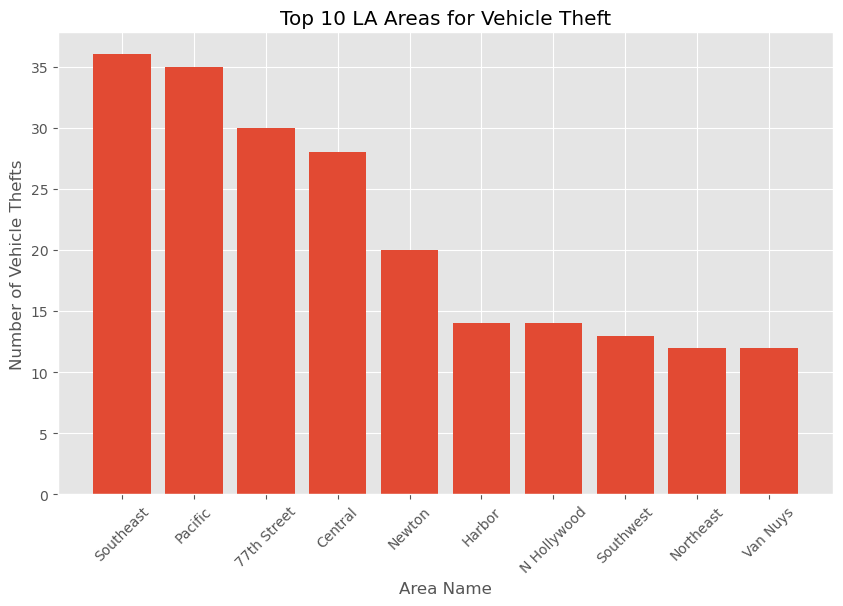

In [36]:


# Filtering the DataFrame for vehicle theft - adapt the condition to match your dataset's specifics
vehicle_theft_df = la_crime_df[la_crime_df["Crm_Cd_Desc"].str.contains("VEHICLE - STOLEN", na=False)]

# Counting occurrences in each area and getting the top 10
top_vehicle_theft_areas = vehicle_theft_df['Area_Name'].value_counts().head(10)

# Display the results
print(top_vehicle_theft_areas)
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_vehicle_theft_areas.index, top_vehicle_theft_areas.values)  # Plot a bar chart
plt.title('Top 10 LA Areas for Vehicle Theft')
plt.xlabel('Area Name') 
plt.ylabel('Number of Vehicle Thefts') 
plt.xticks(rotation=45) 
plt.show()  


In [37]:
la_crime_df.shape

(691277, 12)

In [38]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691277 entries, 1 to 925718
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date_Occ      691277 non-null  datetime64[ns]
 1   Time_Occ      691277 non-null  int64         
 2   Area_Name     691277 non-null  object        
 3   Part_1-2      691277 non-null  int64         
 4   Crm_Cd_Desc   691277 non-null  object        
 5   Vict_Age      691277 non-null  int64         
 6   Vict_Sex      691277 non-null  object        
 7   Vict_Descent  691277 non-null  object        
 8   Status_Desc   691277 non-null  object        
 9   Crm_Cd_1      691277 non-null  float64       
 10  Lat           691277 non-null  float64       
 11  Lon           691277 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 68.6+ MB


In [39]:
#Pre Machine Learning 
#Visualize the data using pandas histogram for the continous variables 

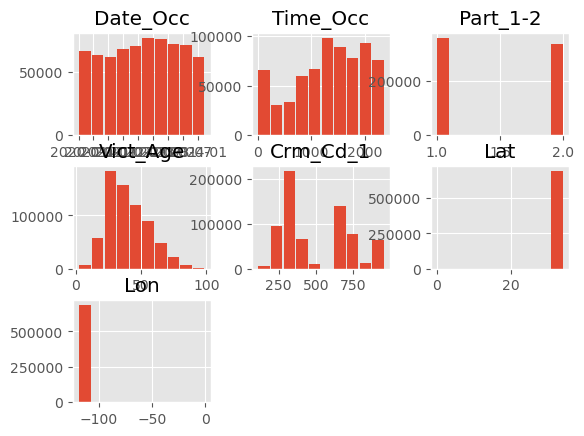

<Figure size 1000x600 with 0 Axes>

In [40]:
la_crime_df.hist(rwidth=0.9)
plt.figure(figsize=(10, 6))  # Set the figure size
plt.tight_layout()

In [41]:
#the above visualization looks like it is in normal distribution

In [42]:
la_crime_df.head()

,Date_Occ,Time_Occ,Area_Name,Part_1-2,Crm_Cd_Desc,Vict_Age,Vict_Sex,Vict_Descent,Status_Desc,Crm_Cd_1,Lat,Lon
1,2020-02-08,1800,Central,1,BURGLARY FROM VEHICLE,47,M,Other,Invest Cont,330.0,34.0444,-118.2628
2,2020-11-04,1700,Southwest,1,BIKE - STOLEN,19,X,Unknown,Invest Cont,480.0,34.0210,-118.3002
3,2020-03-10,2037,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,Other,Invest Cont,343.0,34.1576,-118.4387
4,2020-08-17,1200,Hollywood,2,THEFT OF IDENTITY,28,M,Hispanic/Latin/Mexican,Invest Cont,354.0,34.0944,-118.3277
5,2020-12-01,2300,Southeast,2,THEFT OF IDENTITY,41,M,Hispanic/Latin/Mexican,Invest Cont,354.0,33.9467,-118.2463


In [43]:
la_crime_df = la_crime_df[["Vict_Sex","Vict_Age","Lat","Lon","Area_Name","Crm_Cd_Desc"]]

In [44]:
la_crime_df.head()

,Vict_Sex,Vict_Age,Lat,Lon,Area_Name,Crm_Cd_Desc
1,M,47,34.0444,-118.2628,Central,BURGLARY FROM VEHICLE
2,X,19,34.0210,-118.3002,Southwest,BIKE - STOLEN
3,M,19,34.1576,-118.4387,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4,M,28,34.0944,-118.3277,Hollywood,THEFT OF IDENTITY
5,M,41,33.9467,-118.2463,Southeast,THEFT OF IDENTITY


In [45]:
la_crime_df["Vict_Sex"].value_counts()

Vict_Sex
M    348235
F    334231
X      8811
Name: count, dtype: int64

In [46]:
la_crime_df["Area_Name"].value_counts()

Area_Name
Central        48784
77th Street    43957
Southwest      43942
Pacific        38818
Hollywood      36911
Southeast      35001
Olympic        34395
N Hollywood    33538
Wilshire       33532
Topanga        32063
Newton         31979
Rampart        31494
West LA        31439
Van Nuys       31116
West Valley    29015
Mission        28132
Northeast      27657
Devonshire     27176
Harbor         26191
Foothill       23117
Hollenbeck     23020
Name: count, dtype: int64

In [47]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691277 entries, 1 to 925718
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Vict_Sex     691277 non-null  object 
 1   Vict_Age     691277 non-null  int64  
 2   Lat          691277 non-null  float64
 3   Lon          691277 non-null  float64
 4   Area_Name    691277 non-null  object 
 5   Crm_Cd_Desc  691277 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 36.9+ MB


In [48]:
#change the object dtypes into categorical
la_crime_df["Vict_Sex"] = la_crime_df["Vict_Sex"].astype("category")
la_crime_df["Area_Name"] = la_crime_df["Area_Name"].astype("category")

In [49]:
la_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691277 entries, 1 to 925718
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Vict_Sex     691277 non-null  category
 1   Vict_Age     691277 non-null  int64   
 2   Lat          691277 non-null  float64 
 3   Lon          691277 non-null  float64 
 4   Area_Name    691277 non-null  category
 5   Crm_Cd_Desc  691277 non-null  object  
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 27.7+ MB


In [50]:
#Target/dependent Variable Crm_Cd_Desc
#independent variables Vict_Sex, Vict_Age, Lat, Lon,Area_Name

In [51]:
la_crime_df.dtypes

Vict_Sex       category
Vict_Age          int64
Lat             float64
Lon             float64
Area_Name      category
Crm_Cd_Desc      object
dtype: object

In [52]:

# Convert 'Vict_Sex' and 'Area_Name' to dummy variables
dummies = pd.get_dummies(la_crime_df[['Vict_Sex', 'Area_Name']])
dummies =dummies.astype(int)

# Concatenate the dummy DataFrame with the original DataFrame (optional)
# This step assumes you want to keep the rest of your data alongside the new dummy variables
la_crime_df = pd.concat([la_crime_df, dummies], axis=1)

# Optionally, you might want to drop the original columns if they are no longer needed
la_crime_df.drop(['Vict_Sex', 'Area_Name'], axis=1, inplace=True)

# Display the DataFrame to verify changes
la_crime_df.head(2)


,Vict_Age,Lat,Lon,Crm_Cd_Desc,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X,Area_Name_77th Street,Area_Name_Central,Area_Name_Devonshire,...,Area_Name_Olympic,Area_Name_Pacific,Area_Name_Rampart,Area_Name_Southeast,Area_Name_Southwest,Area_Name_Topanga,Area_Name_Van Nuys,Area_Name_West LA,Area_Name_West Valley,Area_Name_Wilshire
1,47,34.0444,-118.2628,BURGLARY FROM VEHICLE,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,19,34.0210,-118.3002,BIKE - STOLEN,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [53]:

#creating x and y variables
x= la_crime_df.drop("Crm_Cd_Desc", axis = 1)
y=la_crime_df["Crm_Cd_Desc"]

In [54]:
x.shape # its a dataframe

(691277, 27)

In [55]:
y.shape # series 

(691277,)

In [56]:
y

1                                   BURGLARY FROM VEHICLE
2                                           BIKE - STOLEN
3                SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4                                       THEFT OF IDENTITY
5                                       THEFT OF IDENTITY
                               ...                       
925714                                  THEFT OF IDENTITY
925715                                        TRESPASSING
925716     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
925717    THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
925718                           BATTERY - SIMPLE ASSAULT
Name: Crm_Cd_Desc, Length: 691277, dtype: object

In [57]:
x

,Vict_Age,Lat,Lon,Vict_Sex_F,Vict_Sex_M,Vict_Sex_X,Area_Name_77th Street,Area_Name_Central,Area_Name_Devonshire,Area_Name_Foothill,...,Area_Name_Olympic,Area_Name_Pacific,Area_Name_Rampart,Area_Name_Southeast,Area_Name_Southwest,Area_Name_Topanga,Area_Name_Van Nuys,Area_Name_West LA,Area_Name_West Valley,Area_Name_Wilshire
1,47,34.0444,-118.2628,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19,34.0210,-118.3002,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19,34.1576,-118.4387,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,34.0944,-118.3277,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41,33.9467,-118.2463,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925714,62,34.2707,-118.2917,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
925715,79,34.2278,-118.4051,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
925716,36,34.2271,-118.3878,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
925717,44,34.2260,-118.6214,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
#create train and test dataset
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0) # 

# You would then train your classifier on X_train and y_train


In [59]:
from sklearn.tree import DecisionTreeClassifier # DecisionTree classifier

In [60]:
#entropy measures the diversity or impurity of within the data , our aim is to get low entropy value
#gini index or coefficient 
#information Gain we can use this for both entropy or gini methods

In [61]:
# IN DecsionTree we are always considering
#min_sample_split
#min_sample_leaf
#max_leaf_nodes
#splitter
#max_features
#presort
#criterion
#min_impurity_decrease

In [62]:
#Train the model and create the object dtc decsion tree classifier
dtc = DecisionTreeClassifier(random_state = 0)

In [63]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [64]:
y_predict = dtc.predict(x_test)
y_predict

array(['BURGLARY', 'BATTERY - SIMPLE ASSAULT',
       'CHILD ANNOYING (17YRS & UNDER)', ..., 'ROBBERY',
       'DISTURBING THE PEACE',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'],
      dtype=object)

In [65]:
#Evaluating the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
score = dtc.score(x_test,y_test)

In [66]:
cm

array([[  13,    1,   35, ...,    2,    0,    0],
       [   0,   15,    7, ...,    0,    0,    0],
       [  43,    7, 2214, ...,  100,   10,    1],
       ...,
       [   7,    0,  139, ...,  711,    9,    0],
       [   0,    0,    3, ...,   35,    5,    0],
       [   0,    0,    1, ...,    0,    0,    0]], dtype=int64)

In [67]:
score

0.13288971183890752

In [68]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

def fit_decision_tree(la_crime_df, features, target='Crm_Cd_Desc'):
    # Ensure the features list only includes the columns specified
    x = la_crime_df[['Vict_Age', 'Lat', 'Lon', 'Vict_Sex_F', 'Vict_Sex_M', 'Vict_Sex_X',
            'Area_Name_77th Street', 'Area_Name_Central', 'Area_Name_Devonshire',
            'Area_Name_Foothill', 'Area_Name_Harbor', 'Area_Name_Hollenbeck',
            'Area_Name_Hollywood', 'Area_Name_Mission', 'Area_Name_N Hollywood',
            'Area_Name_Newton', 'Area_Name_Northeast', 'Area_Name_Olympic',
            'Area_Name_Pacific', 'Area_Name_Rampart', 'Area_Name_Southeast',
            'Area_Name_Southwest', 'Area_Name_Topanga', 'Area_Name_Van Nuys',
            'Area_Name_West LA', 'Area_Name_West Valley', 'Area_Name_Wilshire']]
    y = la_crime_df[['Crm_Cd_Desc']]

    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

    # Initialize and train the decision tree classifier
    model = DecisionTreeClassifier(random_state=0)
    model.fit(x_train, y_train)

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Output the classification report
    print(classification_report(y_test, y_pred))

    # Output feature importance
    feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    print("Feature Importances:\n", feature_importance)

    # Plot the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(model, filled=True, feature_names=features, class_names=[str(cls) for cls in model.classes_], proportion=True)
    plt.show()

    return model

# Example usage
# Define the features list according to your DataFrame structure
features = ['Vict_Age', 'Lat', 'Lon', 'Vict_Sex_F', 'Vict_Sex_M', 'Vict_Sex_X',
            'Area_Name_77th Street', 'Area_Name_Central', 'Area_Name_Devonshire',
            'Area_Name_Foothill', 'Area_Name_Harbor', 'Area_Name_Hollenbeck',
            'Area_Name_Hollywood', 'Area_Name_Mission', 'Area_Name_N Hollywood',
            'Area_Name_Newton', 'Area_Name_Northeast', 'Area_Name_Olympic',
            'Area_Name_Pacific', 'Area_Name_Rampart', 'Area_Name_Southeast',
            'Area_Name_Southwest', 'Area_Name_Topanga', 'Area_Name_Van Nuys',
            'Area_Name_West LA', 'Area_Name_West Valley', 'Area_Name_Wilshire'] # List of feature names

# Make sure your DataFrame 'la_crime_df' is preprocessed before using this function
model = fit_decision_tree(la_crime_df, features)



C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Haile\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Michael Haile\anaconda3\Lib\si

                                                          precision    recall  f1-score   support

                                                   ARSON       0.03      0.04      0.03       354
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER       0.16      0.26      0.20        57
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT       0.15      0.17      0.16     12731
                                       ATTEMPTED ROBBERY       0.01      0.01      0.01      1010
                                BATTERY - SIMPLE ASSAULT       0.16      0.19      0.18     18068
                                BATTERY ON A FIREFIGHTER       0.02      0.02      0.02        46
                                 BATTERY POLICE (SIMPLE)       0.13      0.15      0.14       180
                             BATTERY WITH SEXUAL CONTACT       0.04      0.04      0.04       998
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM       0.00      0.00      0.00         1
                   

KeyboardInterrupt: 